In [8]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from water_tank_battery import simulate, SimpleBattery

In [9]:
SOLAR_MAX = 400

solar_raw = pd.read_csv("data/solar.csv", index_col=0)
power_production = solar_raw / solar_raw.max() * SOLAR_MAX
power_production = power_production.to_numpy().reshape(-1)

POWER_STATIC = 30
POWER_MAX = 200

taxi_count_5min = pd.read_csv("data/taxi.csv", index_col=0)
power_consumption = taxi_count_5min / taxi_count_5min.max() * (POWER_MAX - POWER_STATIC) + POWER_STATIC
power_consumption = power_consumption.to_numpy().reshape(-1)

BATTERY_CAPACITY = 2000  # Wh
BATTERY_SOC = 0.5

battery = SimpleBattery(capacity=BATTERY_CAPACITY, soc=BATTERY_SOC)
#battery = PybammBattery(capacity=BATTERY_CAPACITY, soc=BATTERY_SOC)

In [10]:
measurements_df = simulate(battery, power_production, power_consumption)

In [11]:
measurements_df

,production_power,consumption_power,delta_power,excess_energy,soc
0,0.0,55.244029,-55.244029,0.000000,0.500000
1,0.0,57.715472,-57.715472,0.000000,0.326854
2,0.0,54.184839,-54.184839,0.000000,0.164299
3,0.0,52.242991,-52.242991,0.000000,0.007570
4,0.0,49.065421,-49.065421,-2792.523364,0.000000
...,...,...,...,...,...
8347,0.0,83.665628,-83.665628,-5019.937695,0.000000
8348,0.0,81.370717,-81.370717,-4882.242991,0.000000
8349,0.0,73.073728,-73.073728,-4384.423676,0.000000
8350,0.0,75.192108,-75.192108,-4511.526480,0.000000


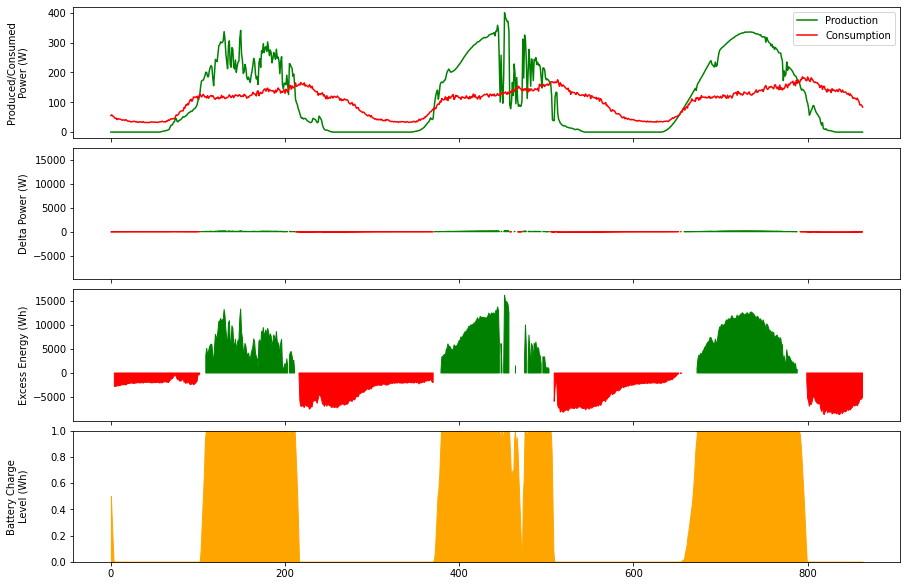

In [12]:
# Only plot first thre days
measurements_df = measurements_df[:12*24*3]

fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=1, nrows=4, sharex=True, figsize=(12,8))
fig.tight_layout(pad=0)

measurements_df["production_power"].plot(ax=ax1, color="green", label="Production")
measurements_df["consumption_power"].plot(ax=ax1, color="red", label="Consumption")
ax1.set_ylabel("Produced/Consumed\nPower (W)")
ax1.legend()

x = measurements_df["delta_power"]
x.plot(ax=ax2, alpha=0)  # this call improves performance
ax2.fill_between(x.index, 0, x.values, where=x.values>0, color="green")
ax2.fill_between(x.index, 0, x.values, where=x.values<0, color="red")
ax2.set_ylabel("Delta Power (W)")

x = measurements_df["excess_energy"]
x.plot(ax=ax3, alpha=0)  # performance
ax3.fill_between(x.index, 0, x.values, where=x.values>0, color="green")
ax3.fill_between(x.index, 0, x.values, where=x.values<0, color="red")
ax2.sharey(ax3)
ax3.set_ylabel("Excess Energy (Wh)")

x = measurements_df["soc"]
x.plot(ax=ax4, alpha=0)  # performance
ax4.fill_between(x.index, 0, x.values, color="orange")
ax4.set_ylim(0, 1)
ax4.set_ylabel("Battery Charge\nLevel (Wh)")

fig.align_ylabels()